In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
import seaborn as sns
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [0]:
X = load_boston().data
Y = load_boston().target



In [0]:
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)


In [166]:
clf = SGDRegressor(average=True)
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

25.578652465650105


In [0]:
def cost_funct(y,y_cap):
  a=np.mean(np.square(np.subtract(y_cap,y)))
  return a/2

In [0]:
def cost_dev(loss,xi=1):   #1 because i will also calculate for bias term
  a=(-2)*(loss)*(xi)
  return a

In [312]:
#w0=np.ones((1,13))
b=1
w0=np.random.randn(13)[np.newaxis]
m=len(X)
r=.1
b=.5
#derivative_w=0
new_w=w0
new_b=b
list_of_mse=[]
for i in range(0,200):
  y_hat=np.dot(new_w,X.T)+new_b
 
  loss=Y-y_hat
  #mse=np.mean(loss**2)/(2)
  
  mse=mean_squared_error(Y[np.newaxis],y_hat)
  #print(new_w)
  #derivative_w=np.sum((-2* X.T*loss),axis=1)/m
  #derivative_b=(-2*np.sum(loss.T))/m
  derivative_w=np.sum(cost_dev(loss,X.T),axis=1)/m
  derivative_b=np.sum(cost_dev(loss))/m
  list_of_mse.append(mse)
 
  #new_mse=mean_squared_error(Y[np.newaxis],y_hat)
  if(i>1):
    if((list_of_mse[-2] <list_of_mse[-1])):
      break;
  new_w=new_w-((r*derivative_w.T))
  new_b=new_b-((r*derivative_b.T))
  if(i%10==0):
    r+=r/10
list_of_mse.pop()
print("Gradient descent is converged at step %i with mse: %f"%(i-1,list_of_mse[-1]))  

Gradient descent is converged at step 162 with mse: 23.988261


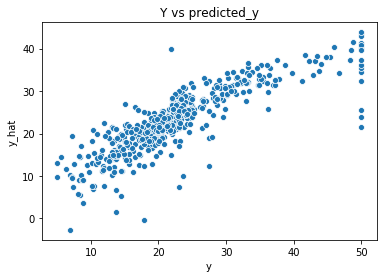

In [332]:
sns.scatterplot(Y, y_hat.T.ravel())
plt.title('Y vs predicted_y')
plt.ylabel('y_hat')
plt.xlabel('y')
plt.show()


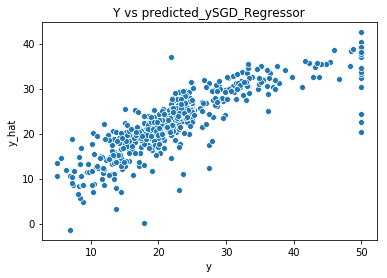

In [334]:
sns.scatterplot(Y, clf.predict(X))
plt.title('Y vs predicted_ySGD_Regressor')
plt.ylabel('y_hat')
plt.xlabel('y')
plt.show()


In [0]:
aa= new_w.tolist()[0]
aa.append(new_b)

In [0]:
bb

In [0]:
bb=clf.coef_.tolist()
bb.append(clf.intercept_[0])

In [369]:
comparison=pd.DataFrame(data=[aa,bb],index=['my_impl','sgd_impl'])
comparison

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
my_impl,-3.414033,2.675381,-1.263762,3.368599,-2.016154,23.581129,1.309973,-5.364998,3.012743,-2.367558,-7.300306,6.282593,-16.754728,15.724783
sgd_impl,-2.762843,3.503853,-1.057134,3.537972,-1.746341,20.538130,1.527249,-3.408195,2.661334,-2.960624,-6.234819,7.069877,-14.301381,14.114069


In [0]:
# the 13th term is the bias

In [370]:
print(mean_squared_error(Y, clf.predict(X)))
print(list_of_mse[-1])

25.5786524656501
23.988261225821713
